In [1]:
%load_ext diagmagic

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [2]:
%%bash
export https_proxy=http://x.x.x.x:YYYY
git clone https://github.com/t-tkgh/nwdiag_filter.git

Cloning into 'nwdiag_filter'...


In [3]:
data = """
[defaults]
stdout_callback = json
filter_plugins = ./nwdiag_filter
"""
%store str(data)  > ansible.cfg

Writing 'str(data)' (str) to file 'ansible.cfg'.


In [4]:
data = """
- hosts: all
  gather_facts: no
  connection: local
  tasks:
  - debug:
      msg: "{{ data | nwdiag_filter }}"
"""
%store str(data) > demo.yml

Writing 'str(data)' (str) to file 'demo.yml'.


In [5]:
data = """
[local]
localhost
"""
%store str(data) > host

Writing 'str(data)' (str) to file 'host'.


In [6]:
data = """
data:
  node:
  - ifname: ge-0/0/0
    vlan: 1000
    name: router01
    address: 192.168.0.1
    vrf: vrf01
  - ifname: ge-0/0/1
    vlan: 2000
    name: router01
    address: 192.168.1.10
    vrf: vrf01
  - ifname: ge-0/0/1
    vlan: '1000'
    name: router02
    address: 192.168.0.2
    vrf: vrf02
  - ifname: ge-0/0/1
    vlan: '2000'
    name: router02
    address: 192.168.2.2
    vrf: vrf02
  - ifname: "gigabitethernet 0/1"
    name: cpe01
    address: 192.168.1.11
  - ifname: "gigabitethernet 0/1"
    name: cpe02
    address: 192.168.2.1
  network: 
  - name: test
    address: "192.168.0.0/24"
  defaultmask: 29
  """
%store str(data) > extra-vars.yml

Writing 'str(data)' (str) to file 'extra-vars.yml'.


In [7]:
import json
output = !ansible-playbook -i host demo.yml --extra-vars "@extra-vars.yml"
jsonstring = ""
for line in output:
    jsonstring = jsonstring + line + "\n"
outputdict = json.loads(jsonstring)
print (outputdict)

{'plays': [{'play': {'id': 'b746dbf9-f067-bdf1-7af3-000000000006', 'name': 'all'}, 'tasks': [{'hosts': {'localhost': {'_ansible_no_log': False, '_ansible_verbose_always': True, 'changed': False, 'msg': '{\n  network test {\n      address = "192.168.0.0/24"\n\n\n      "router01:vrf01" [address = "ge-0/0/0.1000\\n192.168.0.1"];\n      "router02:vrf02" [address = "ge-0/0/1.1000\\n192.168.0.2"];\n  }\n  network "192.168.1.10\\nautogenerated" {\n      address = "192.168.1.8/29"\n\n\n      "router01:vrf01" [address = "ge-0/0/1.2000\\n192.168.1.10"];\n      "cpe01" [address = "gigabitethernet 0/1\\n192.168.1.11"];\n  }\n  network "192.168.2.2\\nautogenerated" {\n      address = "192.168.2.0/29"\n\n\n      "router02:vrf02" [address = "ge-0/0/1.2000\\n192.168.2.2"];\n      "cpe02" [address = "gigabitethernet 0/1\\n192.168.2.1"];\n  }\n}\n'}}, 'task': {'id': 'b746dbf9-f067-bdf1-7af3-000000000008', 'name': ''}}]}], 'stats': {'localhost': {'changed': 0, 'failures': 0, 'ok': 1, 'skipped': 0, 'unrea

True


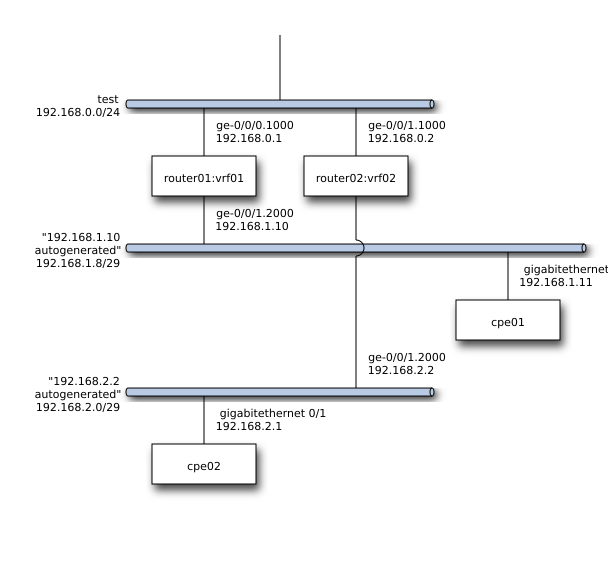

In [8]:
get_ipython().run_cell_magic('nwdiag', '', str(outputdict['plays'][0]['tasks'][-1]['hosts']['localhost']['msg']))